In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyGDM2 import (core, propagators, fields, 
                    materials, linear, structures, 
                    tools, visu)


In [3]:
def get_spectrum(struct):
    """ Obtain a simulated absorption spectra for a hexagonal nanorod mesh
    Inputs:
        struct : a pyGDM2 structure object
    """

    field_generator = fields.plane_wave
    wavelengths = np.linspace(400, 1000, 5)
    kwargs = dict(theta=0, inc_angle=180)

    efield = fields.efield(field_generator,
                   wavelengths=wavelengths, kwargs=kwargs)
    n1 = n2 = 1.0
    dyads = propagators.DyadsQuasistatic123(n1=n1, n2=n2)

    sim = core.simulation(struct, efield, dyads)
    sim.scatter(verbose=False)
    field_kwargs = tools.get_possible_field_params_spectra(sim)

    config_idx = 0
    wl, spectrum = tools.calculate_spectrum(sim,
                        field_kwargs[config_idx], linear.extinct)
    
    abs_ = spectrum.T[2]/np.max(spectrum.T[2])
    
    return wl, abs_


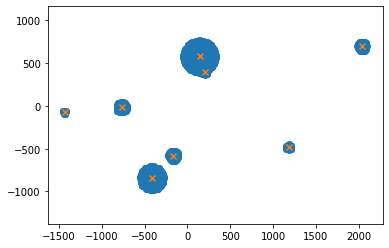

/Users/pozzolabadmin/Google Drive/Projects/Genetic_Algorithm/env/lib/python3.8/site-packages/pyGDM2/tools.py:923: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.233492916649505
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))
/Users/pozzolabadmin/Google Drive/Projects/Genetic_Algorithm/env/lib/python3.8/site-packages/pyGDM2/tools.py:756: UserWarning: Inconsistent structure!!! 2 of 8152 dipoles don't match with step=20.00nm.
  warnings.warn("Inconsistent structure!!! {} of {} dipoles don't match with step={:.2f}nm.".format(
/Users/pozzolabadmin/Google Drive/Projects/Genetic_Algorithm/env/lib/python3.8/site-packages/pyGDM2/structures.py:153: UserWarning: using only consistent part of structure. Please verify the geometry.
  warnings.warn("using only consistent part of structure. " +


In [8]:
from scipy import stats
import pdb

def generate_polydisperse_structure(r_mu, plot=True):
    
    # randmoly select number of structures
    n_structures = stats.randint.rvs(1,10,size=1)
    
    # sample radius from a Gaussian distribution
    step = 20
    r_sigma = 2
    radii = stats.norm.rvs(loc=r_mu,scale=r_sigma,size=n_structures)

    # sample few spatial locations to place the particles at
    spatial_scale = (r_mu+r_sigma)*step*5
    mean = [0, 0]
    cov = [[2.0, 0.3], [0.3, 0.5]]
    XY= spatial_scale*stats.multivariate_normal.rvs(mean, cov, size=n_structures)
    
    geom_list = []

    for i in range(n_structures[0]):
        _geo = structures.sphere(step, R=radii[i], mesh='hex')
        _geo = structures.shift(_geo, [XY[i,0], XY[i,1], 0])
        geom_list.append(_geo)

    geometry = structures.combine_geometries(geom_list)
    
    if plot:
        fig, ax = plt.subplots()
        ax.scatter(geometry[:,0], geometry[:,1])
        ax.scatter(XY[:,0], XY[:,1], marker='x')
        ax.axis('equal')
        plt.show()
    
    material = materials.gold()
    struct = structures.struct(step, geometry, material, verbose=False)
    
    return struct

struct = generate_polydisperse_structure(5)

In [ ]:
wl, I = get_spectrum(struct)
fig,ax = plt.subplots()
ax.plot(wl,I)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity')
plt.show()